In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\atorr\OneDrive - Instituto Politecnico Nacional\Documents\Julia Projects\GenDP-main-GITHUB-Ric-MVC\test\raw_results_VC.csv", header=0)

In [4]:
df_alg = pd.melt(df, id_vars =['TreeSize','MinVertexCover','pm','NumPopu'], value_vars =['NaiveGAAppRatio', 'HalfGenDPAppRatio','GenDPAppRatio'], var_name='algorithm', value_name='ratio')

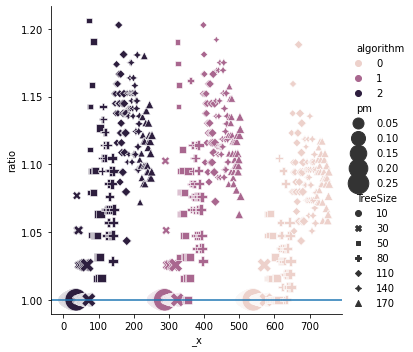

In [41]:
gz = sns.relplot(
    data=df_alg,
    x=np.arange(1,len(df_alg)+1,1), y="ratio", sizes=(50, 500),hue="algorithm",
    size="pm",style="TreeSize"
)
gz.ax.axhline(1.00)

In [6]:
df_alg.tail(5)

,TreeSize,MinVertexCover,pm,NumPopu,algorithm,ratio
751,170,74.0,0.017647,100.0,GenDPAppRatio,1.058559
752,170,74.0,0.017647,100.0,GenDPAppRatio,1.063063
753,170,74.0,0.017647,100.0,GenDPAppRatio,1.076577
754,170,74.0,0.017647,100.0,GenDPAppRatio,1.094595
755,170,74.0,0.017647,100.0,GenDPAppRatio,1.085586


In [7]:
df_alg['algorithm']=df_alg['algorithm'].astype('category').cat.codes

In [8]:
df_alg.tail(5)

,TreeSize,MinVertexCover,pm,NumPopu,algorithm,ratio
751,170,74.0,0.017647,100.0,0,1.058559
752,170,74.0,0.017647,100.0,0,1.063063
753,170,74.0,0.017647,100.0,0,1.076577
754,170,74.0,0.017647,100.0,0,1.094595
755,170,74.0,0.017647,100.0,0,1.085586


In [58]:
print("Maximo Naive")
df_alg.loc[df_alg['algorithm']==2,'ratio'].max()

Maximo Naive


1.2063492063492065

In [60]:
print("Maximo Half DP")
df_alg.loc[df_alg['algorithm']==1,'ratio'].max()

Maximo Half DP


1.2028985507246377

In [56]:
print("Maximo genDP")
df_alg.loc[df_alg['algorithm']==0,'ratio'].max()

Maximo genDP


1.1884057971014492

In [9]:
ave = df_alg.groupby(["TreeSize","algorithm"])["ratio"].mean()
ave

TreeSize  algorithm
10        0            1.000000
          1            1.000000
          2            1.000000
30        0            1.000712
          1            1.007835
          2            1.009972
50        0            1.014991
          1            1.062169
          2            1.071869
80        0            1.033598
          1            1.076984
          2            1.086772
110       0            1.094203
          1            1.131039
          2            1.135668
140       0            1.089297
          1            1.128060
          2            1.137163
170       0            1.088589
          1            1.110861
          2            1.111737
Name: ratio, dtype: float64

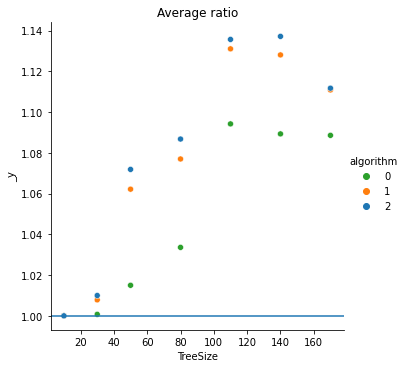

In [14]:
ave_tree_plot = sns.relplot(
    data=ave,
    x="TreeSize", y=ave.values,hue="algorithm",palette=["C2", "C1", "C0"],
    
).set(title='Average ratio')
ave_tree_plot.ax.axhline(1.00)

In [16]:
ave_pm = df_alg.groupby(["TreeSize","pm","algorithm"])["ratio"].mean()
ave_pm.tail()

TreeSize  pm        algorithm
170       0.014706  1            1.105856
                    2            1.119369
          0.017647  0            1.072823
                    1            1.104354
                    2            1.108859
Name: ratio, dtype: float64

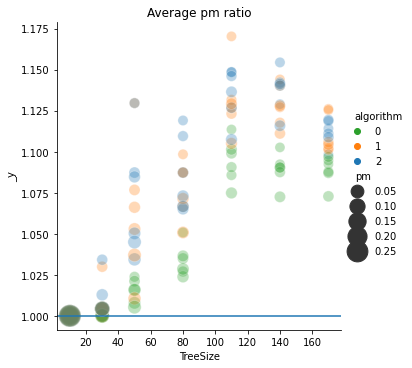

In [19]:
ave_pm_tree_plot = sns.relplot(
    data=ave_pm,
    x="TreeSize", y=ave_pm.values, sizes=(100, 500),hue="algorithm",size="pm",alpha=0.3,palette=["C2", "C1", "C0"]
    
).set(title='Average pm ratio')
ave_pm_tree_plot.ax.axhline(1.00)

In [21]:
df_alg_index= df_alg.groupby(['algorithm'])

In [25]:
df_alg_index.groups.keys()

dict_keys([0, 1, 2])

In [28]:
naive_avg_pm = df_alg_index.get_group(2).groupby(["TreeSize","pm"])["ratio"].mean()


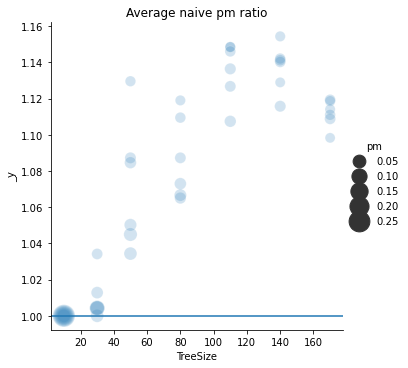

In [62]:
naive_avg_pm_plot = sns.relplot(
    data=naive_avg_pm,
    x="TreeSize", y=naive_avg_pm.values, sizes=(100, 500),size="pm",alpha=0.2,palette='mako'
    
).set(title='Average naive pm ratio')
naive_avg_pm_plot.ax.axhline(1.00)

In [31]:
naive_avg_pm_popu = df_alg_index.get_group(2).groupby(["TreeSize","pm","NumPopu"])["ratio"].mean()

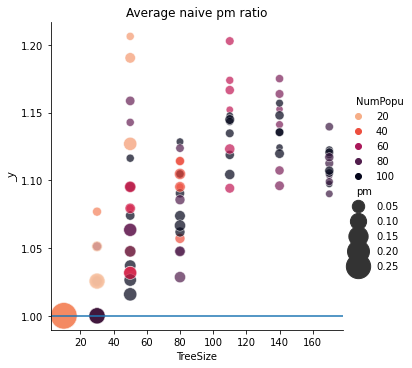

In [32]:
sns.color_palette("mako", as_cmap=True)
naive_avg_pm_popu_plot = sns.relplot(
    data=naive_avg_pm_popu,
    x="TreeSize", y=naive_avg_pm_popu.values,size="pm",hue="NumPopu",alpha=0.7,palette="rocket_r",sizes=(50, 700)
    
).set(title='Average naive pm ratio')
naive_avg_pm_popu_plot.ax.axhline(1.00)

In [33]:
halfDP_avg_pm_popu = df_alg_index.get_group(1).groupby(["TreeSize","pm","NumPopu"])["ratio"].mean()
halfDP_avg_pm_popu

TreeSize  pm        NumPopu
10        0.050000  5.0        1.000000
                    10.0       1.000000
                    15.0       1.000000
                    20.0       1.000000
                    25.0       1.000000
                                 ...   
170       0.011765  100.0      1.100901
          0.014706  85.0       1.117117
                    100.0      1.103604
          0.017647  85.0       1.103604
                    100.0      1.104505
Name: ratio, Length: 150, dtype: float64

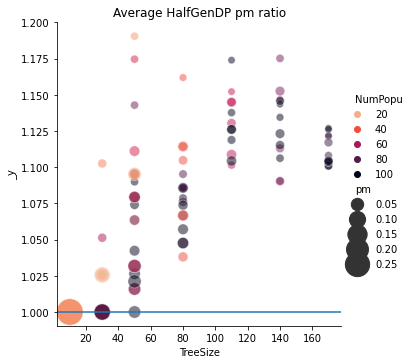

In [36]:
sns.color_palette("mako", as_cmap=True)
halfDP_avg_pm_popu_plot = sns.relplot(
    data=halfDP_avg_pm_popu,
    x="TreeSize", y=halfDP_avg_pm_popu.values,size="pm",hue="NumPopu",alpha=0.5,palette="rocket_r",sizes=(50, 700)
    
).set(title='Average HalfGenDP pm ratio')
halfDP_avg_pm_popu_plot.ax.axhline(1.00)

In [38]:
genDP_avg_pm_popu = df_alg_index.get_group(0).groupby(["TreeSize","pm","NumPopu"])["ratio"].mean()
genDP_avg_pm_popu

TreeSize  pm        NumPopu
10        0.050000  5.0        1.000000
                    10.0       1.000000
                    15.0       1.000000
                    20.0       1.000000
                    25.0       1.000000
                                 ...   
170       0.011765  100.0      1.098198
          0.014706  85.0       1.090090
                    100.0      1.086486
          0.017647  85.0       1.058559
                    100.0      1.075676
Name: ratio, Length: 150, dtype: float64

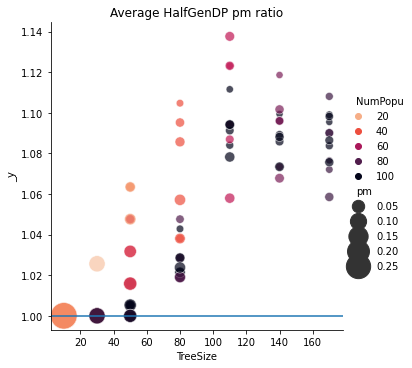

In [39]:
sns.color_palette("mako", as_cmap=True)
genDP_avg_pm_popu_plot = sns.relplot(
    data=genDP_avg_pm_popu,
    x="TreeSize", y=genDP_avg_pm_popu.values,size="pm",hue="NumPopu",alpha=0.7,palette="rocket_r",sizes=(50, 700)
    
).set(title='Average HalfGenDP pm ratio')
genDP_avg_pm_popu_plot.ax.axhline(1.00)